In [8]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [9]:
import cv2
import numpy as np
import os
import csv

In [10]:
trainingDataset = []
img_size = 100
path = "/content/drive/My Drive/ML_Project2/Train"


In [11]:
classNumber = 0
trainingDataset.clear()

for folder in (os.listdir(path)):
  print(classNumber)
  print("Folder Name:",folder)
  # folder = with_mask ,without_mask
  fp = os.path.join(path,folder)
  # joining folder like /content/Face_Mask/Train/with_mask
  for eachImage in os.listdir(fp):
    imagePath = os.path.join(fp,eachImage)
    img = (cv2.imread(imagePath,cv2.IMREAD_GRAYSCALE))/255
    resize=cv2.resize(img,(img_size,img_size))
    trainingDataset.append([resize,classNumber])
  classNumber = classNumber + 1

0
Folder Name: Pepper Healthy
1
Folder Name: Pepper Unhealthy


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pickle
import time

In [13]:
X = []
Y = []
img_size = 100
np.random.shuffle(trainingDataset)
for features, label in trainingDataset:
    X.append(features)
    Y.append(label)
print(Y) 

[0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 

In [14]:
X = np.array(X).reshape(-1, img_size, img_size, 1)
Y_binary = to_categorical(Y)
print(Y_binary)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [15]:
model = Sequential()

model.add(Conv2D(200, (3, 3), input_shape=(100,100,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(100, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50))
model.add(Activation('relu'))
 
model.add(Dense(2))
model.add(Activation('softmax'))

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              )

In [20]:
history = model.fit(X, Y_binary,
          batch_size = 32,
          epochs=20, validation_split = 0.1)
 
model.save("/content/drive/My Drive/ML_Project2/Models/{NAME}.model")

Epoch 1/20
70/70 [==============================] - 164s 2s/step - loss: 0.0196 - accuracy: 0.9942 - val_loss: 0.3849 - val_accuracy: 0.9274
Epoch 2/20
70/70 [==============================] - 164s 2s/step - loss: 0.0140 - accuracy: 0.9955 - val_loss: 0.3602 - val_accuracy: 0.9274
Epoch 3/20
70/70 [==============================] - 163s 2s/step - loss: 0.0095 - accuracy: 0.9955 - val_loss: 0.4448 - val_accuracy: 0.9153
Epoch 4/20
70/70 [==============================] - 164s 2s/step - loss: 0.0189 - accuracy: 0.9946 - val_loss: 0.3699 - val_accuracy: 0.9234
Epoch 5/20
70/70 [==============================] - 163s 2s/step - loss: 0.0131 - accuracy: 0.9960 - val_loss: 0.3135 - val_accuracy: 0.9234
Epoch 6/20
70/70 [==============================] - 164s 2s/step - loss: 0.0102 - accuracy: 0.9960 - val_loss: 0.3369 - val_accuracy: 0.9274
Epoch 7/20
70/70 [==============================] - 164s 2s/step - loss: 0.0194 - accuracy: 0.9955 - val_loss: 0.3846 - val_accuracy: 0.9234
Epoch 8/20
70

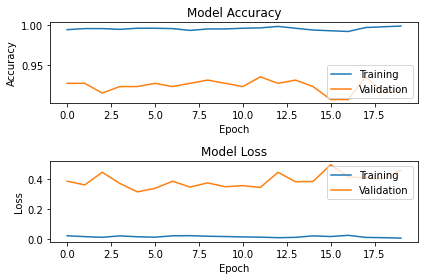

In [21]:
plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()

plt.show()

In [22]:
def prepare(filepath):
    img_size = 100 
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)/255  
    img_resize = cv2.resize(img, (img_size, img_size))  
    return img_resize.reshape(-1, img_size, img_size, 1)

In [24]:
prediction = model.predict(prepare("/content/drive/My Drive/ML_Project2/Test/Pepper_Unhealthy/check.JPG"))
print((prediction))

CATEGORIES = ["healthy", "unhealthy"]

pred_class = CATEGORIES[np.argmax(prediction)]
print(pred_class)

[[5.1280035e-06 9.9999487e-01]]
unhealthy
